In [1]:
"""
Preamble for most code and jupyter notebooks
@author: bridgetsmart
@notebook date: 10 Feb 2023
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import math, string, re, pickle, json, time, os, sys, datetime, itertools


# Investigation of Process Entropy, Self Entropy (notes in overleaf)

In [2]:
source = np.ones(9)
print(source)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
N = len(source)

for i in range(1, N): 

    # The target process is everything ahead of i.
    t_max = 0
    c_max = 0

    for j in range(0, i): # Look back at the past # SOURCE
        if source[j] == source[i]: # Check if matches future's next element
            c_max = 1
            for k in range(1,min(N-i, i-j)): # Look through more of future
                if source[j+k] != source[i+k]:
                    break
                else:
                    c_max = c_max+1

            if c_max > t_max:
                t_max = c_max 

    lambdas[i] = t_max+1

target is i to k
source j to k

# start of source is ok
K goes from 0 to (N-2)/2+1 (WE TAKE THE MINIMUM)

condition 1 goes from N-1 to 0 
condition 2 goes from 1 to N



In [4]:
N = len(source)

# for i in range(1,N):
i=5
for j in range(0,i):
    k = np.min([N-i,i-j])-1
    print(f'i: {i}, j: {j}, k: {k}, N-i: {N-i}, i-j: {i-j} i+k: {source[i+k]}, j+k: {source[j+k]}')

    s_li = ['|']*N
    t_li = ['|']*N

    s_li[i:i+k+1] = 's'*len(s_li[i:i+k+1])
    t_li[j:j+k+1] = 't'*len(t_li[j:j+k+1])


    print(" ".join(s_li))
    print(" ".join(t_li))
    print("\n")



i: 5, j: 0, k: 3, N-i: 4, i-j: 5 i+k: 1.0, j+k: 1.0
| | | | | s s s s
t t t t | | | | |


i: 5, j: 1, k: 3, N-i: 4, i-j: 4 i+k: 1.0, j+k: 1.0
| | | | | s s s s
| t t t t | | | |


i: 5, j: 2, k: 2, N-i: 4, i-j: 3 i+k: 1.0, j+k: 1.0
| | | | | s s s |
| | t t t | | | |


i: 5, j: 3, k: 1, N-i: 4, i-j: 2 i+k: 1.0, j+k: 1.0
| | | | | s s | |
| | | t t | | | |


i: 5, j: 4, k: 0, N-i: 4, i-j: 1 i+k: 1.0, j+k: 1.0
| | | | | s | | |
| | | | t | | | |




## NOTE - NOT AN ISSUE as match length limits

### we go to the end of the array, but not to i for the source

# CROSS ENTROPY


In [5]:
relative_pos = []
source = np.arange(20)
words = [1,2,3,4,5]

relative_pos.extend( [len(source)]*len(words) )

In [6]:
relative_pos

[20, 20, 20, 20, 20]

In [7]:
decorated_target = [(i+0.5,"target",np.arange(10)) for i in range(10) ]
decorated_source = [(i,"source",np.arange(10)) for i in range(10) ]

In [8]:
time_tweets = decorated_target + decorated_source
time_tweets.sort()

In [9]:
time_tweets

[(0, 'source', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (0.5, 'target', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (1, 'source', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (1.5, 'target', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (2, 'source', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (2.5, 'target', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (3, 'source', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (3.5, 'target', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (4, 'source', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (4.5, 'target', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (5, 'source', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (5.5, 'target', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (6, 'source', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (6.5, 'target', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (7, 'source', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (7.5, 'target', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (8, 'source', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (8.5, 'target', array([0, 1, 2, 3, 4, 5, 6, 7, 8

In [10]:
target, source, relative_pos = [], [], []
for time,user,tweet in time_tweets:
    words = tweet
    if user == "target":
        target.extend(words)
        relative_pos.extend( [len(source)]*len(words) )
    else:                                                                                                                        
        source.extend(words)

In [11]:
source[10]

0

In [12]:
relative_pos[0]

10

In [13]:
source = np.arange(10)
target = np.arange(10)

In [14]:
source_size = source.shape[0]-1
target_size = target.shape[0]-1

print(source_size,target_size)
for si in range(0, source_size+1):
    print(f'si: {si}, ei: {min(target_size, source_size - si+1)-1}')


9 9
si: 0, ei: 8
si: 1, ei: 8
si: 2, ei: 7
si: 3, ei: 6
si: 4, ei: 5
si: 5, ei: 4
si: 6, ei: 3
si: 7, ei: 2
si: 8, ei: 1
si: 9, ei: 0


In [15]:
target[9]=8

In [16]:
source, target

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 8]))

In [17]:

source_size = source.shape[0]-1
target_size = target.shape[0]-1
t_max = 0
c_max = 0

si=0


if source[si] == target[0]:
    c_max = 1
    print(f'si: {si}, ei: {min(target_size, source_size - si+1)-1}')
    for ei in range(1,min(target_size, source_size - si+1)):
        print(f'{si+ei}, {source[si+ei]},{target[ei]},{c_max}')
        if(source[si+ei] != target[ei]):
            break
        else:
            c_max = c_max+1

    if c_max > t_max:
        t_max = c_max 

si: 0, ei: 8
1, 1,1,1
2, 2,2,2
3, 3,3,3
4, 4,4,4
5, 5,5,5
6, 6,6,6
7, 7,7,7
8, 8,8,8


In [18]:
c_max

9

In [19]:
t_max+1

10

In [20]:
# checking


source = np.array([5,1,2,3,4,1,2,1,1,1,2,3,1,2,2])
target = np.array([1,1,1,1,2,3,4,2,3,4,1,2,2,1,1,2])


source_size = source.shape[0]-1
target_size = target.shape[0]-1
t_max = 0
c_max = 0

si=7


if source[si] == target[0]:
    c_max = 1
    print(f'si: {si}, ei: {min(target_size, source_size - si+1)-1}')
    for ei in range(1,min(target_size, source_size - si+1)+1): ##### NEEDS A PLUS
        print(f'{si+ei}, {source[si+ei]},{target[ei]},{c_max}')
        if(source[si+ei] != target[ei]):
            break
        else:
            c_max = c_max+1

    if c_max > t_max:
        t_max = c_max 

si: 7, ei: 7
8, 1,1,1
9, 1,1,2
10, 2,1,3


In [21]:
t_max

3

In [ ]:
N = len(source)

for i in prange(1, N): 

    # The target process is everything ahead of i.
    t_max = 0
    c_max = 0

    for j in range(0, i): # Look back at the past # SOURCE
        if source[j] == source[i]: # Check if matches future's next element
            c_max = 1
            for k in range(1,min(N-i, i-j)): # Look through more of future
                if source[j+k] != source[i+k]:
                    break
                else:
                    c_max = c_max+1

            if c_max > t_max:
                t_max = c_max 

    lambdas[i] = t_max+1

In [23]:
def find_lambda_jit(target, source):
    """
    Finds the longest subsequence of the target array, 
    starting from index 0, that is contained in the source array.
    Returns the length of that subsequence + 1.
    
    i.e. returns the length of the shortest subsequence starting at 0 
    that has not previously appeared.
    
    Args:
        target: NumPy array, preferable of type int.
        source: NumPy array, preferable of type int.
    
    Returns:
        Integer of the length.
        
    """
    
    source_size = source.shape[0]-1
    target_size = target.shape[0]-1
    t_max = 0
    c_max = 0

    for si in range(0, source_size+1):
        if source[si] == target[0]:
            c_max = 1
            for ei in range(1,min(target_size+1, source_size - si+1)):
                if(source[si+ei] != target[ei]):
                    break
                else:
                    c_max = c_max+1

            if c_max > t_max:
                t_max = c_max 
                
    return t_max+1

In [24]:
find_lambda_jit(np.array([0,1,2,3,4,5,6,7,8,9]),np.arange(10))

11

In [25]:
len(source)

15

In [26]:
N = 10

target_size = 9
# for i in range(1,N):
i=5
for j in range(0,i):
    k = min(target_size, N - i)-1
    print(f'i: {i}, j: {j}, k: {k}, N-i: {N-i}, i-j: {i-j} i+k: {source[i+k]}, j+k: {source[j+k]}')

    s_li = ['|']*N
    t_li = ['|']*N

    s_li[i:i+k+1] = 's'*len(s_li[i:i+k+1])
    t_li[j:j+k+1] = 't'*len(t_li[j:j+k+1])


    print(" ".join(s_li))
    print(" ".join(t_li))
    print("\n")



i: 5, j: 0, k: 4, N-i: 5, i-j: 5 i+k: 1, j+k: 4
| | | | | s s s s s
t t t t t | | | | |


i: 5, j: 1, k: 4, N-i: 5, i-j: 4 i+k: 1, j+k: 1
| | | | | s s s s s
| t t t t t | | | |


i: 5, j: 2, k: 4, N-i: 5, i-j: 3 i+k: 1, j+k: 2
| | | | | s s s s s
| | t t t t t | | |


i: 5, j: 3, k: 4, N-i: 5, i-j: 2 i+k: 1, j+k: 1
| | | | | s s s s s
| | | t t t t t | |


i: 5, j: 4, k: 4, N-i: 5, i-j: 1 i+k: 1, j+k: 1
| | | | | s s s s s
| | | | t t t t t |




# FAST ENTROPY

### Note - does need the space - this is notes from 14/02/2022 IGNORE
# begin by installing

In [ ]:
pip install -i https://test.pypi.org/simple/ LCSFinder

ERROR: You must give at least one requirement to install (see "pip help install")
Note: you may need to restart the kernel to use updated packages.


In [1]:
# load packages
import LCSFinder as lcs
import numpy as np

In [2]:
# initialise strings
list_source = np.arange(7)
list_target = np.arange(8,12)

In [5]:

# set up objects
source = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_source])])
target = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_target])])
ob = lcs.LCSFinder(source,target) # s1 and then s2

# s1 = source
# s2 = target

In [43]:

# set up indices to search from
l_t =  lcs.Vector2D(tuple((i,i+1) for i in range(len(list_source))))

m_len = ob.ComputeAllLCSs(l_t)


In [44]:
search = tuple((i,i+1) for i in range(len(list_source)))

In [45]:
print(f'So we are comparing')
[print(f'source {x[0]} to n, {list_source[x[0]:]} is compared to target to {x[1]}, {list_target[:x[1]]}') for x in search]

print(f'match lengths of {m_len}')

So we are comparing
source 0 to n, [0 1 2 3 4 5 6] is compared to target to 1, [8]
source 1 to n, [1 2 3 4 5 6] is compared to target to 2, [8 9]
source 2 to n, [2 3 4 5 6] is compared to target to 3, [ 8  9 10]
source 3 to n, [3 4 5 6] is compared to target to 4, [ 8  9 10 11]
source 4 to n, [4 5 6] is compared to target to 5, [ 8  9 10 11]
source 5 to n, [5 6] is compared to target to 6, [ 8  9 10 11]
source 6 to n, [6] is compared to target to 7, [ 8  9 10 11]
match lengths of (0, 0, 0, 0, 0, 0, 0)


it gives the length of the match between the considering sequence in source (i:n) which MUST start at index i
and ANY substring in the target [:j]

- need to swap around and play with indexes to get entropy vals

So, we need

target (s1)[i:n] # current time to end

compared to
source (s2)[:j]

Where i=j

- Want to iterate through each $i$ from $1<i<n$, as if i=0, we have a match length of zero.

- prepend 0 to the results

In [7]:
%%timeit
list_target = list(np.random.randint(0,5,1000))
list_source = list(np.random.randint(0,5,1000))
# set up objects
s2 = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_source])])
s1 = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_target])])
ob = lcs.LCSFinder(s1,s2) # s1 and then s2

# s2 = source
# s1 = target 
## MAYBE CHANGE ORDER GET INPUTTED

# set up indices to search from
search = tuple((i,i+1) for i in range(len(s2)))
l_t =  lcs.Vector2D(search)
ob.GetS()
ob.GetSA()
ob.ComputeAllLCSs(l_t)


1.83 ms ± 6.55 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Comparison with Python

In [45]:
list_target = [0, 1, 1, 1, 1, 0, 0, 0]
list_source = [0, 1, 1, 0, 0, 1, 0, 0]

# set up objects
s2 = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_source])])
s1 = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_target])])
ob = lcs.LCSFinder(s1,s2) # s1 and then s2

# s2 = source
# s1 = target 
## MAYBE CHANGE ORDER GET INPUTTED

# set up indices to search from
search = tuple((i,i+1) for i in range(len(s2)))
l_t =  lcs.Vector2D(search)

ob.GetSA(), ob.ComputeAllLCSs(l_t)

((8, 16, 7, 15, 6, 5, 12, 13, 9, 0, 14, 4, 11, 3, 10, 2, 1),
 (1, 1, 2, 3, 3, 2, 2, 1))

In [35]:
ob.GetS()

(2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2)

In [36]:
ob.GetSA()

(8, 7, 6, 1, 13, 2, 16, 5, 0, 12, 15, 4, 11, 14, 3, 10, 9)

In [66]:

# set up objects
s2 = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_source])])
s1 = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_target])])
ob = lcs.LCSFinder(s1,s2) # s1 and then s2

# s2 = source
# s1 = target 
## MAYBE CHANGE ORDER GET INPUTTED

# set up indices to search from
search = tuple((i,len(s1)) for i in range(len(s2)))
l_t =  lcs.Vector2D(search)
m_len = ob.ComputeAllLCSs(l_t)


In [67]:
print(f'So we are comparing')
[print(f'target {x[0]} to n, {list_source[x[0]:]} is compared to source to {x[1]}, {list_target[:x[1]]}') for x in search]

print(f'match lengths of {m_len}')

So we are comparing
target 0 to n, [0 1 2 3 4 5 6] is compared to source to 4, [ 8  9 10 11]
target 1 to n, [1 2 3 4 5 6] is compared to source to 4, [ 8  9 10 11]
target 2 to n, [2 3 4 5 6] is compared to source to 4, [ 8  9 10 11]
target 3 to n, [3 4 5 6] is compared to source to 4, [ 8  9 10 11]
target 4 to n, [4 5 6] is compared to source to 4, [ 8  9 10 11]
target 5 to n, [5 6] is compared to source to 4, [ 8  9 10 11]
target 6 to n, [6] is compared to source to 4, [ 8  9 10 11]
match lengths of (0, 0, 0, 0, 0, 4, 3)


In [49]:
from ProcessEntropy.CrossEntropy import get_all_lambdas

In [50]:
lambdas = get_all_lambdas(list_target,list_source,np.arange(len(list_source)), np.zeros(len(s2)))

In [51]:
lambdas, m_len

(array([1., 1., 1., 1., 0., 0., 0.]), (0, 0, 0, 0, 0, 4, 3))

In [75]:
list_target, list_source

(array([ 8,  9, 10, 11]), array([0, 1, 2, 3, 4, 5, 6]))

In [78]:
get_all_lambdas(list_target,list_source,np.arange(len(list_target)), np.zeros(len(list_target)))

array([1., 1., 1., 1.])

In [76]:
np.arange(len(list_source))

array([0, 1, 2, 3, 4, 5, 6])

In [54]:
from ProcessEntropy.CrossEntropy import find_lambda_jit

In [73]:
find_lambda_jit(target, source)

5

In [ ]:
finds length of longest unseen sequence between ta

In [ ]:
list_target

In [ ]:
For a given target sequence, we want to find the LCS with the source.

So we want to take 

target is s1
s1 [i:n) # this is the target

source is s2
s2[j:end] (want j=0)


Want to iterate over the i's

# Notes from max - comment in LCS code
Computes all the Longest Common Substring (LCS) values for each pair of indexes into s1 and s2.
The first part of a pair is an index into s1 and the second is into s2.
It is assumed inds is sorted.
It is assumed that both the first and second element of each pair are monotonically increasing.
Since each is a "time point", the indexes into s1 and s2 should increase monotonically.

Returns a list of all the LCS values.
For a given pair, say that the first index into s1 is called i and the second into s2 is called j.
The corresponding entry in the return list is the LCS in prefix s2[0..j) that matches a prefix of the string s1[i..n).

#### Original functions have their original names, functions without bugs are called {func_name}_m

In [2]:
from processentfunctions import *

In [2]:
# load packages
import LCSFinder as lcs
import numpy as np

# Initial test

In [29]:
N=10
l = []

for i in range(N):
    if np.random.rand()<0.5:
        l.append(1)
    else:
        l.append(0)

test1 = [x for x in l]
s1 = lcs.Vector1D([x for x in l])

l = []

for i in range(N):
    if np.random.rand()<0.5:
        l.append(1)
    else:
        l.append(0)
test2 = [x for x in l]
s2 = lcs.Vector1D([x for x in l])

# creating 1D vector
# These are your input vectorsa
a = np.array(test1).copy()
b = np.array(test2).copy()
# test1.reverse()
s1 = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in test1])])
s2 = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in test2])])
ob = lcs.LCSFinder(s1,s2)

l_t =  lcs.Vector2D(tuple((i,i+1) for i in range(len(test1))))
store_l = np.zeros(len(a))

lambda_FE = np.array([x+1 for x in ob.ComputeAllLCSs(l_t)])
lambda_PE = get_all_lambdas(a,b, [x+1 for x in list(range(len(a)))],store_l)

print(lambda_FE, lambda_PE, lambda_FE==lambda_PE)


/opt/homebrew/Caskroom/miniforge/base/envs/FastEntropy/lib/python3.9/site-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'relative_pos' of function 'get_all_lambdas'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "processentfunctions.py", line 125:
@jit(nopython=True, parallel=True)
def get_all_lambdas(target, source, relative_pos, lambdas):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/opt/homebrew/Caskroom/miniforge/base/envs/FastEntropy/lib/python3.9/site-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'relative__pos' of function '__numba_parfor_gufunc_0x1393d0fa0'.

For more information visit https://numba.

[1 2 2 2 3 3 3 4 3 2] [1. 2. 2. 2. 3. 3. 3. 3. 2. 2.] [ True  True  True  True  True  True  True False False  True]


# specific test

In [30]:
# initialise strings
list_source = np.array([0,0,0,1,2,3,4,5,6])
list_target = np.array([1,2,3,4,5,5])

# set up objects
source = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_source])])
target = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_target])])

ob = lcs.LCSFinder(target,source) # s1 and then s2

# creating 1D vector
# These are your input vectorsa
pe_target = np.array(list_target).copy()
pe_source = np.array(list_source).copy()

rel_pos = [x+1 for x in list(range(len(pe_target)-1))] + [len(pe_target)-1]


l_t =  lcs.Vector2D(tuple((i,i+1) for i in range(len(target))))
store_l = np.zeros(len(pe_target))

lambda_FE = np.array([x+1 for x in ob.ComputeAllLCSs(l_t)])
lambda_PE = get_all_lambdas(pe_target,pe_source, rel_pos,store_l)

print(lambda_FE, lambda_PE, lambda_FE==lambda_PE)


[1 1 1 1 1 1] [1. 1. 1. 1. 1. 1.] [ True  True  True  True  True  True]


# Checking bugs

## we get diff behaviour for regular function (with bugs)

In [31]:
find_lambda_jit(np.array([1,2,3,4,5,6,7,8,9]), np.arange(10)),find_lambda_jit(np.array([1,2,3,4,5,6,7,8,8]), np.arange(10))

(9, 9)

In [32]:
find_lambda_jit_m(np.array([1,2,3,4,5,6,7,8,9]), np.arange(10)),find_lambda_jit_m(np.array([1,2,3,4,5,6,7,8,8]), np.arange(10))

(10, 9)

## same result for the get_all_lambdas function

In [33]:
get_all_lambdas(np.array([1,2,3,4,5,6,7,8,8]), np.arange(10), [10 for x in list(range(10))],np.zeros(10)), get_all_lambdas(np.array([1,2,3,4,5,6,7,8,9]), np.arange(10), [10 for x in list(range(10))],np.zeros(10))

(array([9., 8., 7., 6., 5., 4., 3., 2., 2., 0.]),
 array([9., 8., 7., 6., 5., 4., 3., 2., 2., 0.]))

In [34]:
get_all_lambdas_m(np.array([1,2,3,4,5,6,7,8,8]), np.arange(10), [10 for x in list(range(10))],np.zeros(10)), get_all_lambdas_m(np.array([1,2,3,4,5,6,7,8,9]), np.arange(10), [10 for x in list(range(10))],np.zeros(10))

/opt/homebrew/Caskroom/miniforge/base/envs/FastEntropy/lib/python3.9/site-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'relative_pos' of function 'get_all_lambdas_m'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "processentfunctions.py", line 45:
@jit(nopython=True, parallel=True)
def get_all_lambdas_m(target, source, relative_pos, lambdas):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/opt/homebrew/Caskroom/miniforge/base/envs/FastEntropy/lib/python3.9/site-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'relative__pos' of function '__numba_parfor_gufunc_0x139b2b910'.

For more information visit https://num

(array([9., 8., 7., 6., 5., 4., 3., 2., 2., 0.]),
 array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  0.]))

In [35]:
get_all_lambdas(np.array([1,2,3,4,5,6,7,8,8]), np.arange(10), [10 for x in list(range(10))],np.zeros(10)), get_all_lambdas(np.array([1,2,3,4,5,6,7,8,9]), np.arange(10), [10 for x in list(range(10))],np.zeros(10))

(array([9., 8., 7., 6., 5., 4., 3., 2., 2., 0.]),
 array([9., 8., 7., 6., 5., 4., 3., 2., 2., 0.]))

## Note - here we set rel_pos = [10,10,...,10]
# so that all source elements occur prior to all target elements

In [12]:
t1 = np.array([0,0,0,0,0,0,0,1,2,3,4,5,6,7,8,9])
t2 = np.array([0,0,0,0,0,0,0,1,2,3,4,5,6,7,8,8])
s = np.array([1,2,3,4,5,6,7,8,9])

get_all_lambdas_m(t1,s,[x+1 for x in list(range(len(t1)))],np.zeros(10)),get_all_lambdas_m(t2, s, [x+1 for x in list(range(len(t2)))],np.zeros(10))

(array([1., 1., 1., 1., 1., 1., 1., 9., 9., 8.]),
 array([1., 1., 1., 1., 1., 1., 1., 9., 8., 7.]))

In [13]:
t1 = np.array([0,0,0,0,0,0,0,1,2,3,4,5,6,7,8,9])
t2 = np.array([0,0,0,0,0,0,0,1,2,3,4,5,6,7,8,8])
s = np.array([1,2,3,4,5,6,7,8,9])

get_all_lambdas(t1,s,[x+1 for x in list(range(len(t1)))],np.zeros(10)),get_all_lambdas(t2, s, [x+1 for x in list(range(len(t2)))],np.zeros(10))

(array([1., 1., 1., 1., 1., 1., 1., 9., 8., 7.]),
 array([1., 1., 1., 1., 1., 1., 1., 9., 8., 7.]))

# checking against FastEnt

In [3]:
# initialise strings
list_source = np.array([1,2,3,4,5,6,7,8,9])
list_target = np.array([0,0,0,0,0,0,0,1,2,3,4,5,6,7,8,9])

# set up objects
source = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_source])])
target = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in list_target])])

ob = lcs.LCSFinder(target,source) # s1 and then s2

# creating 1D vector
# These are your input vectorsa
pe_target = np.array(list_target).copy()
pe_source = np.array(list_source).copy()

rel_pos = [x+1 for x in list(range(len(pe_target)))] 


l_t =  lcs.Vector2D(tuple((i,i+1) for i in range(len(list_target))))

lambda_FE = np.array([x+1 for x in ob.ComputeAllLCSs(l_t)])
lambda_PE = get_all_lambdas(pe_target,pe_source, rel_pos,np.zeros(len(pe_target)))
lambda_PE_m = get_all_lambdas_m(pe_target,pe_source, rel_pos,np.zeros(len(pe_target)))


# printing debug
print(f'We can see that the results from the modified and unmodified code differs:\n{lambda_PE},\n{lambda_PE_m}.\n The results from the FastEntropy estimator match those from the debugged (modified) code \n (FastEntropy) {lambda_FE}\n (CheckEquality modified) {lambda_FE==lambda_PE_m}\n (CheckEquality unmodified) {lambda_FE==lambda_PE}.')

/opt/homebrew/Caskroom/miniforge/base/envs/testlcsfinder/lib/python3.10/site-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'relative_pos' of function 'get_all_lambdas'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "processentfunctions.py", line 124:
@jit(nopython=True, parallel=True)
def get_all_lambdas(target, source, relative_pos, lambdas):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/opt/homebrew/Caskroom/miniforge/base/envs/testlcsfinder/lib/python3.10/site-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'relative__pos' of function '__numba_parfor_gufunc_0x11ea4ab60'.

For more information visit https://

We can see that the results from the modified and unmodified code differs:
[1. 1. 1. 1. 1. 1. 1. 9. 8. 7. 6. 5. 4. 3. 2. 2.],
[1. 1. 1. 1. 1. 1. 1. 9. 9. 8. 7. 6. 5. 4. 3. 2.].
 The results from the FastEntropy estimator match those from the debugged (modified) code 
 (FastEntropy) [1 1 1 1 1 1 1 9 9 8 7 6 5 4 3 2]
 (CheckEquality modified) [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
 (CheckEquality unmodified) [ True  True  True  True  True  True  True  True False False False False
 False False False  True].


# timing single comparison

In [4]:
%timeit get_all_lambdas_m(pe_target,pe_source, rel_pos,np.zeros(len(pe_target)))

77.9 µs ± 3.93 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [5]:
%timeit np.array([x+1 for x in ob.ComputeAllLCSs(l_t)])

3.64 µs ± 32.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Constructing the time matching vector (relative pos)

### In ProcessEntropy
For relative_pos[x] = i
we have that 
everything in source[:x] occured before target[i:]

### In FastEntropy

l_t =  list of tuples with (x,i)


In [4]:
from processentfunctions import *
# load packages
import LCSFinder as lcs
import numpy as np

import datetime
import matplotlib.pyplot as plt

In [5]:
def timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source):

    '''
    Modified version of the timeseries_cross_entropy function (removed please sanitize), to make equivalent between the original and the FastEntropy implementation.

    Function expects two inputs in the form of a list of time-tweet tuples:

    [(time, [list of symbols]),....]
    '''

    decorated_target = [ (time,"target",tweet) for time,tweet in time_tweets_target ]
    decorated_source = [ (time,"source",tweet) for time,tweet in time_tweets_source ]
        
    # Join time series:
    time_tweets = decorated_target + decorated_source

    # Sort in place by time:                                                                                                                 
    time_tweets.sort()

    # Loop over combined tweets and build word vectors and target->source relative_pos:                                                                     
    target, source, relative_pos = [], [], []
    for time,user,tweet in time_tweets:
        words = tweet
        if user == "target":
            target.extend(words)
            relative_pos.extend( [len(source)]*len(words) )
        else:                                                                                                                        
            source.extend(words)
            
    
    target = np.array(target, dtype = np.uint32)
    source = np.array(source, dtype = np.uint32)
    relative_pos = np.array(relative_pos, dtype = np.uint32)

    lambdas = np.zeros(len(target), dtype = np.uint32) # Premake for efficiency
    
    original_lambdas = get_all_lambdas_m(target, source, relative_pos, lambdas)

    return original_lambdas

In [6]:
def timeseries_cross_entropy_FE_entropy(time_tweets_target, time_tweets_source):

    '''
    ** FAST ENTROPY ***

    Modified version of the timeseries_cross_entropy function (removed please sanitize), to make equivalent between the original and the FastEntropy implementation.

    Function expects two inputs in the form of a list of time-tweet tuples:

    [(time, [list of integers]),....]
    '''

    decorated_target = [ (time,"target",tweet) for time,tweet in time_tweets_target ]
    decorated_source = [ (time,"source",tweet) for time,tweet in time_tweets_source ]
        
    # Join time series:
    time_tweets = decorated_target + decorated_source

    # Sort in place by time:                                                                                                                 
    time_tweets.sort()

    # Loop over combined tweets and build word vectors and target->source relative_pos:                                                                     
    target, source, relative_pos = [], [], []
    for time,user,tweet in time_tweets:
        words = tweet
        if user == "target":
            target.extend(words)
            relative_pos.extend( [len(source)]*len(words) )
        else:                                                                                                                        
            source.extend(words)
            
    target = np.array(target, dtype = np.uint32)
    source = np.array(source, dtype = np.uint32)
    relative_pos = np.array(relative_pos, dtype = np.uint32)

    # set up objects
    source = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in source])])
    target = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in target])])

    ob = lcs.LCSFinder(target,source) # s1 and then s2

    l_t =  lcs.Vector2D(tuple((i,int(relative_pos[i])) for i in range(len(relative_pos))))
    
    fastentropy_lambdas = np.array([x+1 for x in ob.ComputeAllLCSs(l_t)])

    return fastentropy_lambdas

### proportion of time we hit bugs

In [2]:
def timeseries_cross_entropy_PE_entropy_original(time_tweets_target, time_tweets_source):

    '''
    Modified version of the timeseries_cross_entropy function (removed please sanitize), to make equivalent between the original and the FastEntropy implementation.

    Function expects two inputs in the form of a list of time-tweet tuples:

    [(time, [list of symbols]),....]
    '''

    decorated_target = [ (time,"target",tweet) for time,tweet in time_tweets_target ]
    decorated_source = [ (time,"source",tweet) for time,tweet in time_tweets_source ]
        
    # Join time series:
    time_tweets = decorated_target + decorated_source

    # Sort in place by time:                                                                                                                 
    time_tweets.sort()

    # Loop over combined tweets and build word vectors and target->source relative_pos:                                                                     
    target, source, relative_pos = [], [], []
    for time,user,tweet in time_tweets:
        words = tweet
        if user == "target":
            target.extend(words)
            relative_pos.extend( [len(source)]*len(words) )
        else:                                                                                                                        
            source.extend(words)
            
    
    target = np.array(target, dtype = np.uint32)
    source = np.array(source, dtype = np.uint32)
    relative_pos = np.array(relative_pos, dtype = np.uint32)

    lambdas = np.zeros(len(target), dtype = np.uint32) # Premake for efficiency
    
    original_lambdas = get_all_lambdas(target, source, relative_pos, lambdas)

    return original_lambdas

In [ ]:
def b_one_iter(N_s, N_t,V,tweet_size):

    return one_iter(N_s, N_t,V,tweet_size)


def one_iter(N_s, N_t,V,tweet_size):
    list_source = np.random.randint(0,V,tweet_size*N_s)
    list_target = np.random.randint(0,V,tweet_size*N_s)

    times_s = np.sort(2*np.random.rand(N_s) + 0.2*np.arange(N_s))
    times_t = np.sort(2*np.random.rand(N_t) + 0.2*np.arange(N_t))


    time_tweets_target = [(times_t[i],list(list_target[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_t)]
    time_tweets_source = [(times_s[i],list(list_source[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_s)]


    return np.all(timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source) == timeseries_cross_entropy_PE_entropy_original(time_tweets_target, time_tweets_source))


In [ ]:
### Process for randomly generating sequences
V = 10
res = []
N_iter = 10

for tweet_size in np.arange(5,50,5):
    for N in range(100,1002,10):

        N_s = N
        N_t = N

        for _ in range(N_iter):
            res.append(b_one_iter(N_s, N_t,V,tweet_size))


In [ ]:
# bug seems to be from timeseries_cross_entropy_PE_entropy
# maybe the get_all_lambdas_m?

In [ ]:
np.mean(res)

## back to it

In [7]:
# recreate above test

list_source = np.array([1,2,3,4,5,6,7,8,9])
list_target = np.array([0,0,0,0,0,0,0,1,2,3,4,5,6,7,8,9])
time_tweets_target = [(i,[list_target[i]]) for i in range(len(list_target))]
time_tweets_source = [(i,[list_source[i]]) for i in range(len(list_source))]

In [8]:
lambdas_pe = timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source)
lambdas_fe = timeseries_cross_entropy_FE_entropy(time_tweets_target, time_tweets_source)

np.all(lambdas_pe == lambdas_fe)

True

In [9]:
### Process for randomly generating sequences
V = 2

tweet_size = 10
N_s = 20
N_t = 20


list_source = np.random.randint(0,V,tweet_size*N_s)
list_target = np.random.randint(0,V,tweet_size*N_s)

times_s = np.sort(2*np.random.rand(N_s) + 0.2*np.arange(N_s))
times_t = np.sort(2*np.random.rand(N_t) + 0.2*np.arange(N_t))


time_tweets_target = [(times_t[i],list(list_target[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_t)]
time_tweets_source = [(times_s[i],list(list_source[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_s)]

lambdas_pe = timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source)
lambdas_fe = timeseries_cross_entropy_FE_entropy(time_tweets_target, time_tweets_source)

np.all(lambdas_pe == lambdas_fe)

True

# run lots of times

In [10]:
### Process for randomly generating sequences
V = 2
res = []
N_iter = 10

for tweet_size in np.arange(5,20):
    for N in range(1,102,10):

        N_s = N
        N_t = N

        for _ in range(N_iter):
            list_source = np.random.randint(0,V,tweet_size*N_s)
            list_target = np.random.randint(0,V,tweet_size*N_s)

            times_s = np.sort(2*np.random.rand(N_s) + 0.2*np.arange(N_s))
            times_t = np.sort(2*np.random.rand(N_t) + 0.2*np.arange(N_t))


            time_tweets_target = [(times_t[i],list(list_target[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_t)]
            time_tweets_source = [(times_s[i],list(list_source[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_s)]

            lambdas_pe = timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source)
            lambdas_fe = timeseries_cross_entropy_FE_entropy(time_tweets_target, time_tweets_source)

            res.append(np.all(lambdas_pe == lambdas_fe))


In [43]:
### Process for randomly generating sequences
V = 50
res = []
N_iter = 10
times_pe = []
times_fe = []
tweet_size = 50
N_x = []


for N in range(1,2002,200):

    N_s = N
    N_t = N

    for _ in range(N_iter):
        list_source = np.random.randint(0,V,tweet_size*N_s)
        list_target = np.random.randint(0,V,tweet_size*N_s)

        times_s = np.sort(2*np.random.rand(N_s) + 0.2*np.arange(N_s))
        times_t = np.sort(2*np.random.rand(N_t) + 0.2*np.arange(N_t))


        time_tweets_target = [(times_t[i],list(list_target[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_t)]
        time_tweets_source = [(times_s[i],list(list_source[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_s)]

        lambdas_pe = timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source)
        lambdas_fe = timeseries_cross_entropy_FE_entropy(time_tweets_target, time_tweets_source)

        res.append(np.all(lambdas_pe == lambdas_fe))


In [44]:
np.all(res)

True

# Checking times for large N (sequence lengths)

In [11]:
from processentfunctions import *
# load packages
import LCSFinder as lcs
import numpy as np
def timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source):

    '''
    Modified version of the timeseries_cross_entropy function (removed please sanitize), to make equivalent between the original and the FastEntropy implementation.

    Function expects two inputs in the form of a list of time-tweet tuples:

    [(time, [list of symbols]),....]
    '''

    decorated_target = [ (time,"target",tweet) for time,tweet in time_tweets_target ]
    decorated_source = [ (time,"source",tweet) for time,tweet in time_tweets_source ]
        
    # Join time series:
    time_tweets = decorated_target + decorated_source

    # Sort in place by time:                                                                                                                 
    time_tweets.sort()

    # Loop over combined tweets and build word vectors and target->source relative_pos:                                                                     
    target, source, relative_pos = [], [], []
    for time,user,tweet in time_tweets:
        words = tweet
        if user == "target":
            target.extend(words)
            relative_pos.extend( [len(source)]*len(words) )
        else:                                                                                                                        
            source.extend(words)
            
    
    target = np.array(target, dtype = np.uint32)
    source = np.array(source, dtype = np.uint32)
    relative_pos = np.array(relative_pos, dtype = np.uint32)

    lambdas = np.zeros(len(target), dtype = np.uint32) # Premake for efficiency
    
    original_lambdas = get_all_lambdas_m(target, source, relative_pos, lambdas)

    return original_lambdas
def timeseries_cross_entropy_FE_entropy(time_tweets_target, time_tweets_source):

    '''
    ** FAST ENTROPY ***

    Modified version of the timeseries_cross_entropy function (removed please sanitize), to make equivalent between the original and the FastEntropy implementation.

    Function expects two inputs in the form of a list of time-tweet tuples:

    [(time, [list of integers]),....]
    '''

    decorated_target = [ (time,"target",tweet) for time,tweet in time_tweets_target ]
    decorated_source = [ (time,"source",tweet) for time,tweet in time_tweets_source ]
        
    # Join time series:
    time_tweets = decorated_target + decorated_source

    # Sort in place by time:                                                                                                                 
    time_tweets.sort()

    # Loop over combined tweets and build word vectors and target->source relative_pos:                                                                     
    target, source, relative_pos = [], [], []
    for time,user,tweet in time_tweets:
        words = tweet
        if user == "target":
            target.extend(words)
            relative_pos.extend( [len(source)]*len(words) )
        else:                                                                                                                        
            source.extend(words)
            
    target = np.array(target, dtype = np.uint32)
    source = np.array(source, dtype = np.uint32)
    relative_pos = np.array(relative_pos, dtype = np.uint32)

    # set up objects
    source = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in source])])
    target = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in target])])

    ob = lcs.LCSFinder(target,source) # s1 and then s2

    l_t =  lcs.Vector2D(tuple((i,int(relative_pos[i])) for i in range(len(relative_pos))))
    
    fastentropy_lambdas = np.array([x+1 for x in ob.ComputeAllLCSs(l_t)])

    return fastentropy_lambdas

In [12]:
import datetime
import matplotlib.pyplot as plt

In [14]:
# Look at run times for increasing N
### Process for randomly generating sequences
V = 2
res = []
N_iter = 50
times_pe = []
times_fe = []
tweet_size = 20
N_x = []

for N in range(1,2502,200):

    N_s = N
    N_t = N

    for _ in range(N_iter):
        N_x.append(tweet_size*N)
        list_source = np.random.randint(0,V,tweet_size*N_s)
        list_target = np.random.randint(0,V,tweet_size*N_s)

        times_s = np.sort(2*np.random.rand(N_s) + 0.2*np.arange(N_s))
        times_t = np.sort(2*np.random.rand(N_t) + 0.2*np.arange(N_t))


        time_tweets_target = [(times_t[i],list(list_target[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_t)]
        time_tweets_source = [(times_s[i],list(list_source[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_s)]


        nowpe = datetime.datetime.now()
        lambdas_pe = timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source)
        thenpe = datetime.datetime.now()

        nowfe = datetime.datetime.now()
        lambdas_fe = timeseries_cross_entropy_FE_entropy(time_tweets_target, time_tweets_source)
        thenfe = datetime.datetime.now()

        times_pe.append((thenpe-nowpe).total_seconds())
        times_fe.append((thenfe-nowfe).total_seconds())

In [15]:
import seaborn as sns

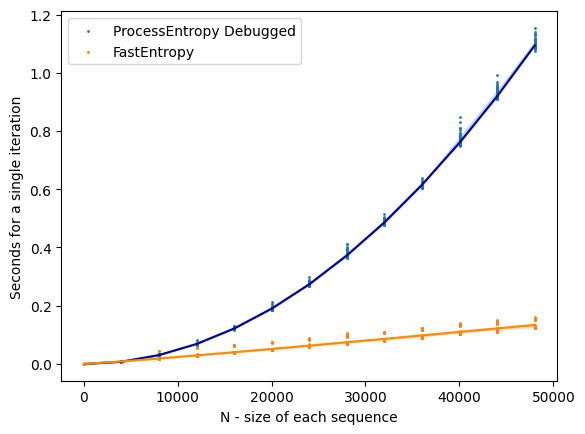

In [16]:
N_x = np.array(N_x)
plt.scatter(N_x,times_pe, label = 'ProcessEntropy Debugged', s=1)
sns.lineplot(x=N_x, y=times_pe, linewidth=0)
sns.lineplot(x=N_x, y=0.76/(1601600400)*N_x**2, c='darkblue')
plt.scatter(N_x,times_fe, label = 'FastEntropy',s=1)
sns.lineplot(x=N_x, y=times_fe, linewidth=0)
sns.lineplot(x=N_x, y = 0.11/4.24097327e+05*N_x*np.log(N_x), c='darkorange')
plt.xlabel('N - size of each sequence')
plt.ylabel('Seconds for a single iteration')
plt.legend()
plt.savefig('speed.pdf')

# Now compare with jit

In [17]:
from ProcessEntropy.CrossEntropy import timeseries_cross_entropy as jit_func_pe

In [20]:
# Look at run times for increasing N
### Process for randomly generating sequences
V = 2
res = []
N_iter = 50
times_pe_jit = []
times_fe = []
tweet_size = 20
N_x = []

for N in range(1,2502,200):

    N_s = N
    N_t = N

    for _ in range(N_iter):
        N_x.append(tweet_size*N)
        list_source = np.random.randint(0,V,tweet_size*N_s)
        list_target = np.random.randint(0,V,tweet_size*N_s)

        times_s = np.sort(2*np.random.rand(N_s) + 0.2*np.arange(N_s))
        times_t = np.sort(2*np.random.rand(N_t) + 0.2*np.arange(N_t))


        time_tweets_target = [(times_t[i],list(list_target[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_t)]
        time_tweets_source = [(times_s[i],list(list_source[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_s)]


        nowpe = datetime.datetime.now()
        lambdas_pe = jit_func_pe(time_tweets_target, time_tweets_source)
        thenpe = datetime.datetime.now()

        nowfe = datetime.datetime.now()
        lambdas_fe = timeseries_cross_entropy_FE_entropy(time_tweets_target, time_tweets_source)
        thenfe = datetime.datetime.now()

        times_pe_jit.append((thenpe-nowpe).total_seconds())
        times_fe.append((thenfe-nowfe).total_seconds())

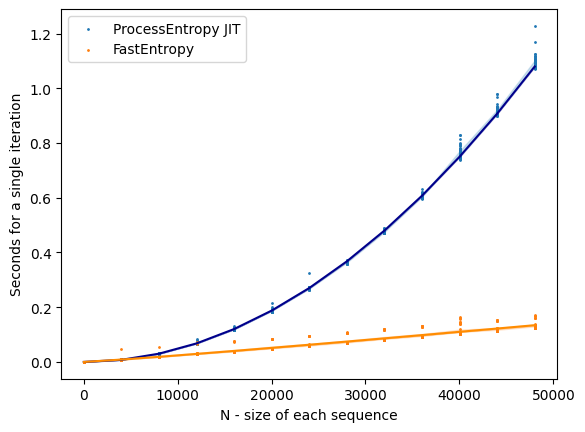

In [24]:
N_x = np.array(N_x)
plt.scatter(N_x,times_pe_jit, label = 'ProcessEntropy JIT',s=1)
sns.lineplot(x=N_x, y=times_pe_jit, linewidth=0)
sns.lineplot(x=N_x, y=0.75/(1601600400)*N_x**2, c='darkblue')
plt.scatter(N_x,times_fe, label = 'FastEntropy', s=1)
sns.lineplot(x=N_x, y=times_fe, linewidth=0)
sns.lineplot(x=N_x, y = 0.11/4.24097327e+05*N_x*np.log(N_x), c='darkorange')
plt.xlabel('N - size of each sequence')
plt.ylabel('Seconds for a single iteration')
plt.legend()
plt.savefig('speedjit.pdf')

# timings

In [16]:
%timeit timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source)

93.8 µs ± 306 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [24]:
%timeit timeseries_cross_entropy_FE_entropy(time_tweets_target, time_tweets_source)

3.96 ms ± 39.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [18]:
%lprun -f timeseries_cross_entropy_FE_entropy timeseries_cross_entropy_FE_entropy(time_tweets_target, time_tweets_source)

Timer unit: 1e-09 s

Total time: 0.000572 s
File: /var/folders/wp/758jq81s3hs0jlp8_31261sc0000gn/T/ipykernel_1861/892030647.py
Function: timeseries_cross_entropy_FE_entropy at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def timeseries_cross_entropy_FE_entropy(time_tweets_target, time_tweets_source):
     2                                           
     3                                               '''
     4                                               ** FAST ENTROPY ***
     5                                           
     6                                               Modified version of the timeseries_cross_entropy function (removed please sanitize), to make equivalent between the original and the FastEntropy implementation.
     7                                           
     8                                               Function expects two inputs in the form of a list of time-tweet tuples:
    

In [25]:
%lprun -f timeseries_cross_entropy_PE_entropy timeseries_cross_entropy_FE_entropy(time_tweets_target, time_tweets_source)

Timer unit: 1e-09 s

Total time: 0 s
File: /var/folders/wp/758jq81s3hs0jlp8_31261sc0000gn/T/ipykernel_1861/1467422569.py
Function: timeseries_cross_entropy_PE_entropy at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source):
     2                                           
     3                                               '''
     4                                               Modified version of the timeseries_cross_entropy function (removed please sanitize), to make equivalent between the original and the FastEntropy implementation.
     5                                           
     6                                               Function expects two inputs in the form of a list of time-tweet tuples:
     7                                           
     8                                               [(time, [list of symbols]),...

### Notes

Most of the time is spend on constructing the objects

# Equivalent function for self-entropy

In [64]:
from ProcessEntropy.SelfEntropy import get_all_self_lambdas

In [65]:
def get_all_self_lambdas_FE_entropy(source):
    """ 
    Internal function.
    Finds the Lambda value for each index in the source.
    Lambda value denotes the longest subsequence of the source, 
    starting from the index, that in contained contiguously in the source,
    before the index.
    
    Args:        
        source: Arry of ints, usually corresponding to hashed words.
            
        lambdas: A premade array of length(target), usually filled with zeros. 
            Used for efficiency reasons.
        
    Return:
        A list of ints, denoting the value for Lambda for each index in the target. 
    
    """
    
    N = len(source)
    
    l_t =  lcs.Vector2D(tuple((i,i) for i in range(1,len(source))))

    source_ob = lcs.Vector1D([int(x) for x in ([np.floor(x) for x in source])])

    ob = lcs.LCSFinder(source_ob,source_ob)
            
    return np.array([0]+[x+1 for x in ob.ComputeAllLCSs(l_t)])


### test performance is stable and matches ProcessEntropy for a large number of random examples

In [40]:
N_iter = 1000
V = 20
seq_length = 10000
res = []

for _ in range(N_iter):
    a = np.random.randint(0,V,seq_length)
    res.append(np.all(get_all_self_lambdas_FE_entropy(a) == get_all_self_lambdas(a, np.zeros(len(a)))))

np.all(res)

True

### timing

In [71]:
# Look at run times for increasing N
### Process for randomly generating sequences

N_iter = 10
V = 20
res = []
times_pe_self = []
times_fe_self = []
N_x_self = []


for seq_length in range(1,50002,200):
    for _ in range(N_iter):
        N_x_self.append(seq_length)
        a = np.random.randint(0,V,seq_length)

        nowfe = datetime.datetime.now()
        get_all_self_lambdas_FE_entropy(a)
        thenfe = datetime.datetime.now()

        nowpe = datetime.datetime.now()
        get_all_self_lambdas(a, np.zeros(len(a)))
        thenpe = datetime.datetime.now()

        times_pe_self.append((thenpe-nowpe).total_seconds())
        times_fe_self.append((thenfe-nowfe).total_seconds())


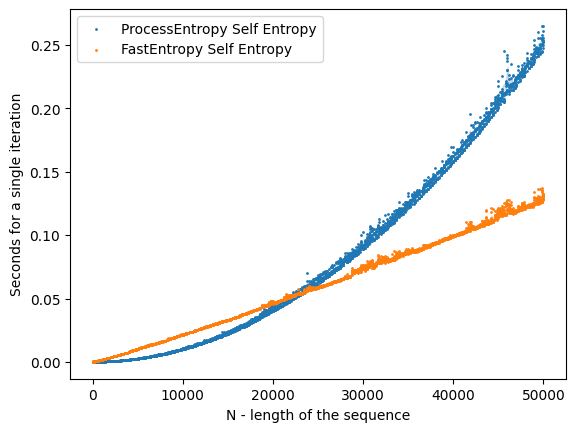

In [72]:
N_x_self = np.array(N_x_self)
plt.scatter(N_x_self,times_pe_self, label = 'ProcessEntropy Self Entropy', s=1)
sns.lineplot(x = N_x_self, y=times_pe_self, linewidth=0)
# sns.lineplot(x=N_x_self, y=0.25/(50000**2)*N_x_self**2, c='darkblue')
plt.scatter(N_x_self,times_fe_self, label = 'FastEntropy Self Entropy', s=1)
sns.lineplot(x = N_x_self, y=times_fe_self, linewidth=0)
# sns.lineplot(x=N_x_self, y = 0.11/4.24097327e+05*N_x_self*np.log(N_x_self), c='darkorange')
plt.xlabel('N - length of the sequence')
plt.ylabel('Seconds for a single iteration')
plt.legend()
plt.savefig('speedselfent.pdf')

# test cases

In [26]:
def b_one_iter(N_s, N_t,V,tweet_size):

    return one_iter(N_s, N_t,V,tweet_size)


def one_iter(N_s, N_t,V,tweet_size):
    list_source = np.random.randint(0,V,tweet_size*N_s)
    list_target = np.random.randint(0,V,tweet_size*N_s)

    times_s = np.sort(2*np.random.rand(N_s) + 0.2*np.arange(N_s))
    times_t = np.sort(2*np.random.rand(N_t) + 0.2*np.arange(N_t))


    time_tweets_target = [(times_t[i],list(list_target[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_t)]
    time_tweets_source = [(times_s[i],list(list_source[tweet_size*i:tweet_size*i+tweet_size])) for i in range(N_s)]


    return np.all(timeseries_cross_entropy_PE_entropy(time_tweets_target, time_tweets_source) == timeseries_cross_entropy_PE_entropy_original(time_tweets_target, time_tweets_source))


In [27]:
### Process for randomly generating sequences
V = 10
res = []
N_iter = 10

for tweet_size in np.arange(5,50,5):
    for N in range(100,1002,10):

        N_s = N
        N_t = N

        for _ in range(N_iter):
            res.append(b_one_iter(N_s, N_t,V,tweet_size))


In [17]:
N_s = 1
N_t = 1
tweet_size = 50
V=5

one_iter(N_s, N_t,V,tweet_size)

False